# Hypothesis Testing

### Instructions: For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like.




Is the website redesign any good?

H<sub>0</sub>: There is no difference in website traffic after the redesign


H<sub>1</sub>: The website traffic has increased since the redesign 

   - True positve: There is a difference in website traffic and we conclude there is a difference.
   
   
   - True negative: There is no difference in website traffice and we conclude there is no difference.
   

   - Type 1 error: we conclude there is a difference in website traffic after the redisign when there actually wasn't


   - Type 2 error: We conclude there is no difference in website traffic after the resdisign when there actually was

Is our television ad driving more sales?

H<sub>0</sub>: There is no difference in sales since our television ad aired

H<sub>1</sub>: Sales have increased since our television ad aired

   - True positve: There is a difference in sales and we conclude there is a difference.
   
   
   - True negative: There is no difference in sales and we conclude there is no difference.
   
- Type 1 error: We conclude sales are up since the ad aired, but there is really no difference in sales

- Type 2 error: We conclude there is no difference in sales after the ad aired but in reality sales have changed

Has the network latency gone up since we switched internet service providers?

H<sub>0</sub>: There is no difference in network latency since we sitched isp

H<sub>1</sub>: Network latency has gone up since we switched isp

   - True positve: There is a difference in network latency and we conclude there is a difference
   
   
   - True negative: There is no difference in network latency and we conlude there is no difference. 
   
- Type 1 error: We conlude there is a difference in network latency since switching isp when in reality there is not

- Type 2 error: We conlude there is no difference in network latency since switching isp when in reality there is


### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [533]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data

office1 = stats.norm.rvs(loc=90,scale=15,size=40)
office2 = stats.norm.rvs(loc=100,scale=20,size=50)
t, p = stats.ttest_ind(office1,office2)

print("t = " , t)
print('p = ', p)

t =  -4.745112465394579
p =  8.003147241173728e-06


### Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [534]:
mpg = data('mpg')
mpg['avg_mpg'] = (mpg.cty + mpg.hwy) / 2
cars_1999 = mpg[mpg.year == 1999].avg_mpg
cars_2008 = mpg[mpg.year == 2008].avg_mpg
stats.ttest_ind(cars_1999,cars_2008)
# Yes, there's a difference in fuel-efficiency in cars from 2008 vs 1999.

Ttest_indResult(statistic=0.21960177245940962, pvalue=0.8263744040323578)

- Are compact cars more fuel-efficient than the average car?

In [535]:
mpg['avg_mpg'] = (mpg.cty + mpg.hwy) / 2
mpg['is_compact'] = mpg['class'].str.contains('compact')
stats.ttest_1samp(mpg.is_compact, mpg.avg_mpg.mean())
mpg.groupby(['class']).mean().sort_values('avg_mpg')
# Yes, compact cars are more fuel efficient than the average car.

,displ,year,cyl,cty,hwy,avg_mpg,is_compact
class,,,,,,,
pickup,4.418182,2003.636364,7.030303,13.000000,16.878788,14.939394,False
suv,4.456452,2003.790323,6.967742,13.500000,18.129032,15.814516,False
minivan,3.390909,2003.090909,5.818182,15.818182,22.363636,19.090909,False
2seater,6.160000,2004.400000,8.000000,15.400000,24.800000,20.100000,False
midsize,2.921951,2003.609756,5.317073,18.756098,27.292683,23.024390,False
compact,2.325532,2003.212766,4.595745,20.127660,28.297872,24.212766,True
subcompact,2.660000,2003.114286,5.028571,20.371429,28.142857,24.257143,True


- Do manual cars get better gas mileage than automatic cars?

In [536]:
mpg['avg_mpg'] = (mpg.cty + mpg.hwy) / 2
mpg['is_manual'] = mpg['trans'].str.contains("manual")
manual = mpg[mpg.is_manual == True].avg_mpg
auto = mpg[mpg.is_manual == False].avg_mpg
stats.ttest_ind(manual, auto)
mpg.groupby(['is_manual']).mean().sort_values('avg_mpg')
# Yes, manual cars have better overall gas mileage than city cars

,displ,year,cyl,cty,hwy,avg_mpg,is_compact
is_manual,,,,,,,
False,3.719745,2003.757962,6.203822,15.968153,22.292994,19.130573,0.254777
True,2.966234,2002.974026,5.246753,18.675325,25.779221,22.227273,0.545455


### Part 2 Correlation

- Use the telco_churn data.

In [537]:
import env
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/telco_churn'

df = pd.read_sql('SELECT * FROM customers', url)

- Does tenure correlate with monthly charges?

In [538]:
r,p = stats.pearsonr(df.tenure, df.monthly_charges)
print(f'r = {r:f}')
print(f'p = {p:f}')
# Yes, tenure does correlate well with monthly charges.

r = 0.247900
p = 0.000000


- Total charges?

In [539]:
df = pd.read_sql('SELECT * FROM customers where total_charges > 0', url)
df['total_charges_float'] = pd.to_numeric(df.total_charges, errors= 'coerce')

r,p = stats.pearsonr(df.tenure, df.total_charges_float)
print(f'r = {r:f}')
print(f'p = {p:f}')
# Yes, tenure and total charges correlate very well.

r = 0.825880
p = 0.000000


- What happens if you control for phone and internet service?

In [540]:
url = f'mysql+pymysql://{user}:{password}@{host}/telco_churn'
phone_internet = pd.read_sql('select * from customers where phone_service = "Yes" and internet_service_type_id = "2"', url)
r,p = stats.pearsonr(phone_internet.tenure, phone_internet.monthly_charges)
print(f'r = {r:f}')
print(f'p = {p:f}')
# When controlling for phone and internet service, monthly charges still correlate very well with tenure

phone_internet['total_charges_float'] = phone_internet['total_charges'].astype('float')
r,p = stats.pearsonr(phone_internet.tenure, phone_internet.total_charges_float)
print(f'r = {r:f}')
print(f'p = {p:f}')
# When controlling for phone and internet service, total charges still correlate very well with tenure



r = 0.624621
p = 0.000000
r = 0.985309
p = 0.000000


- Use the employees database.

In [541]:
url = f'mysql+pymysql://{user}:{password}@{host}/employees'

employees_df = pd.read_sql('SELECT * FROM employees', url)

- Is there a relationship between how long an employee has been with the company and their salary?

In [542]:
salaries = pd.read_sql("""select salary, DateDiff(now(), hire_date) as tenure_in_days 
                        from employees join salaries on salaries.emp_no = employees.emp_no 
                        where to_date = '9999-01-01'""", url)
r,p = stats.pearsonr(salaries.salary, salaries.tenure_in_days)
print(f'r = {r:f}')
print(f'p = {p:f}')
# There is a moderate to weak correlation

r = 0.306463
p = 0.000000


- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [543]:
titles = pd.read_sql("""select emp_no, count(title) as number_of_titles, DateDiff(now(), hire_date) as tenure_in_days 
                        from employees join titles using (emp_no) 
                        group by emp_no""", url)

r = 0.266599
p = 0.000000


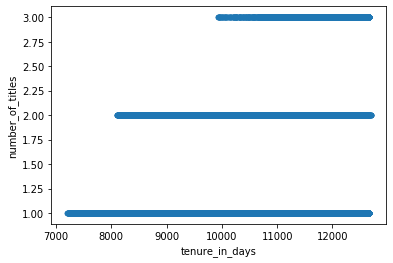

In [544]:
r,p = stats.pearsonr(titles.number_of_titles, titles.tenure_in_days)
print(f'r = {r:f}')
print(f'p = {p:f}')
titles.plot.scatter('tenure_in_days', 'number_of_titles')
# There is a weak correlation

- Use the sleepstudy data. Is there a relationship between days and reaction time?

r = 0.989318
p = 0.000000


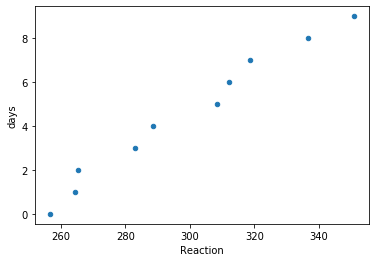

In [545]:
sleep = data("sleepstudy")
sleep = pd.DataFrame(sleep)
sleep['days'] = sleep.Days
sleep = sleep.groupby(['Days']).mean()
r,p = stats.pearsonr(sleep.Reaction, sleep.days)
print(f'r = {r:f}')
print(f'p = {p:f}')
sleep.plot.scatter('Reaction', 'days')
#Yes, there is a very strong correlation between reaction time and days.

### Part 3: Chi Testing

- Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [546]:
index = ['Uses a Macbook', "Doesn't Use A Macbook"]
columns = ['Codeup Student', 'Not Codeup Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
n = observed.values.sum()
observed

,Codeup Student,Not Codeup Student
Uses a Macbook,49,20
Doesn't Use A Macbook,1,30


In [547]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('\nThe results are significant. Reject the null hypothesis that Codeup student and Macbook use are independent')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000

The results are significant. Reject the null hypothesis that Codeup student and Macbook use are independent


- Choose another 2 categorical variables from the mpg dataset and perform a ${\chi}^2$ contingency table test with them. Be sure to state your null and alternative hypotheses.

H$_0$ : Year and transmisison type are indepenedent of each other.

H$_a$ : Year and transmission type are not independent of each other.

In [548]:
mpg = data('mpg')
mpg_observed = pd.DataFrame(mpg)

In [549]:
mpg_observed['trans'] = mpg_observed.trans.str[:-4]

In [550]:
mpg_crosstab = pd.crosstab(mpg_observed.trans, mpg_observed.year)
mpg_crosstab

year,1999,2008
trans,,
auto,74,83
manual,43,34


In [551]:
chi2, p, degf, expected = stats.chi2_contingency(mpg_crosstab)
print('Observed\n')
print(mpg_crosstab.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
#fail to reject the null hypothesis that transmission type and year make are indifferent

Observed

[[74 83]
 [43 34]]
---
Expected

[[78.5 78.5]
 [38.5 38.5]]
---

chi^2 = 1.2388
p     = 0.2657


- Use the data from the employees database to answer these questions:

In [556]:
url = f'mysql+pymysql://{user}:{password}@{host}/employees'
employees_data = pd.read_sql('select * from employees', url)

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [557]:
gender = pd.read_sql("""select dept_name, gender from employees_with_departments
join salaries using (emp_no)
join employees using (emp_no)
where to_date = '9999-01-01' and dept_name = 'Sales' or to_date = '9999-01-01' and dept_name = 'Marketing'""",url)

In [561]:
gender_crosstab = pd.crosstab(gender.dept_name, gender.gender)
gender_crosstab

gender,F,M
dept_name,,
Marketing,6429,9823
Sales,16698,25302


In [565]:
chi2, p, degf, expected = stats.chi2_contingency(gender_crosstab)
print('Observed\n')
print(gender_crosstab.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
#fail to reject the null hypothesis that gender and sales/marketing departments are independent of each other

Observed

[[ 6429  9823]
 [16698 25302]]
---
Expected

[[ 6452.31071895  9799.68928105]
 [16674.68928105 25325.31071895]]
---

chi^2 = 0.1855
p     = 0.6667


- Is an employee's gender independent of whether or not they are or have been a manager?